# **1. PreTrained 된 YOLOv8 사용**


**1.1 왜 YOLOv8 인가?**

![yolo-comparison-plots[1].png](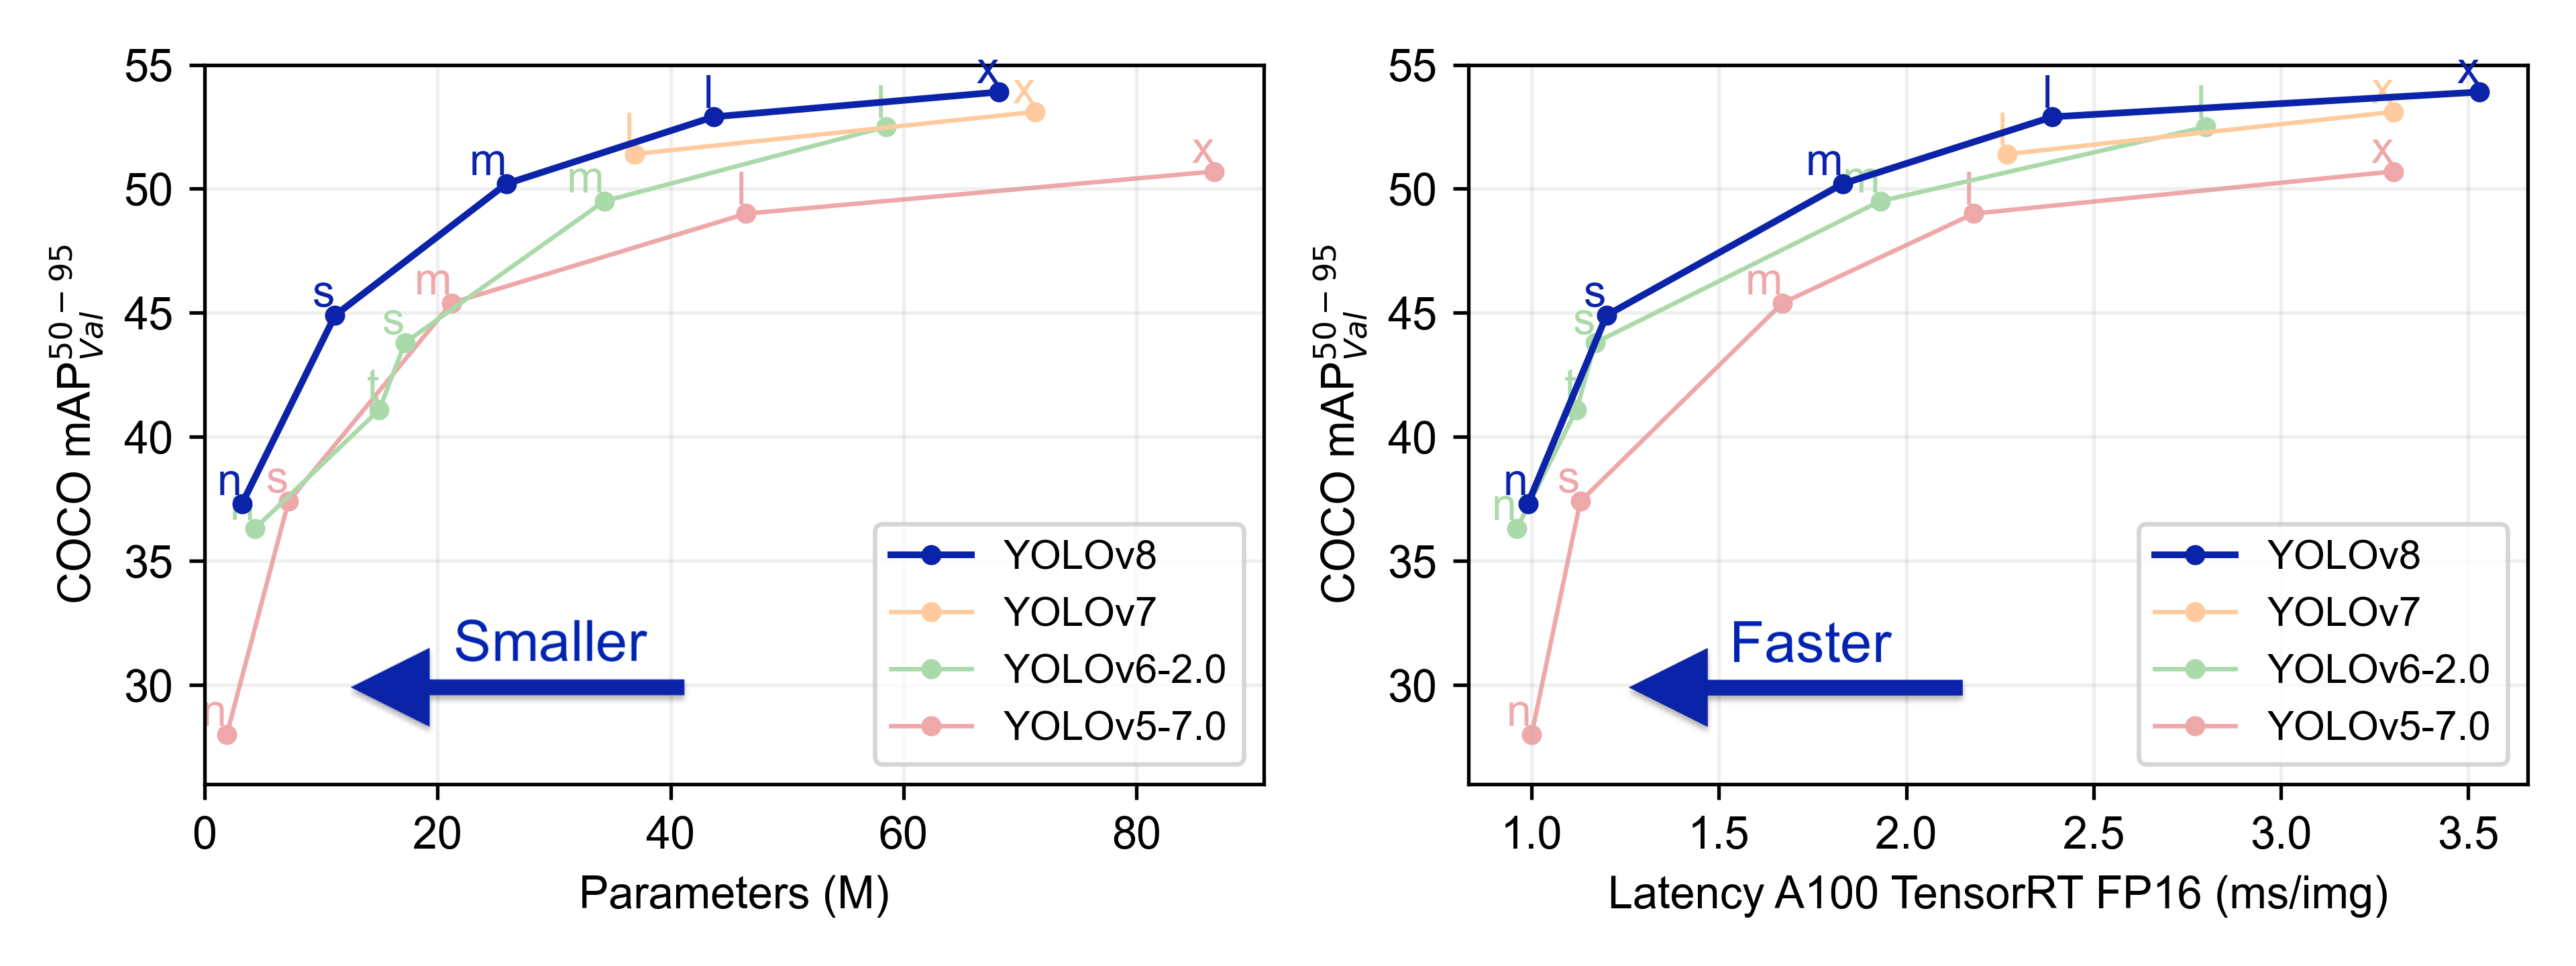)

**1.2 ultraytics에서 제공하는 YOLOv8을 사용하자**
- ultraytics github 참조 : https://github.com/ultralytics/ultralytics

**1.3 YOLOv8을 사용하기 위한 Setup(셋업)**

In [1]:
# ultralytics 설치
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.9/626.9 kB 35.1 MB/s eta 0:00:00


In [2]:
# ultralytics 를 불러오고 체크
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/107.7 GB disk)


# **2. YOLOv8로 할 수 있는 일**
   - Detect(검출), Segmentation(분할), Tracking(추적), Pose(포즈) 를 수행할 수 있음

![banner-tasks[1].png](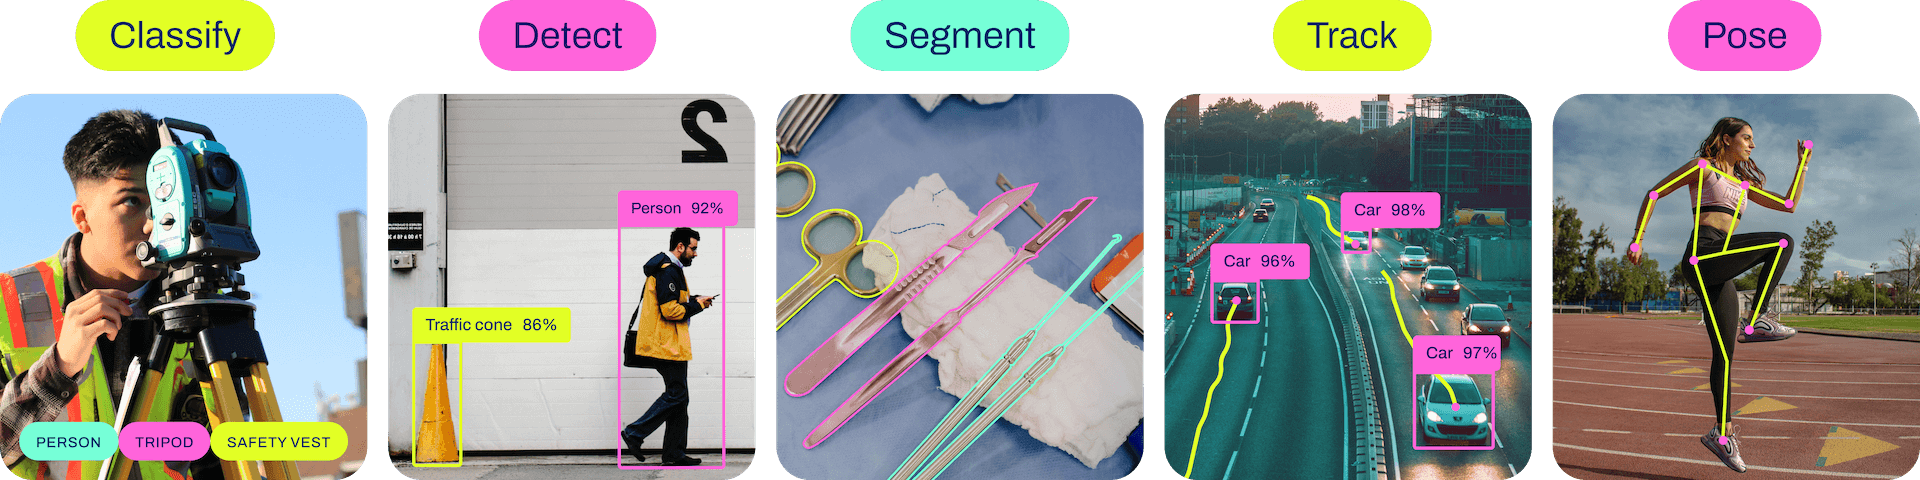)

**2.1 Detection(검출)**
- Detection 모델로 사용할 수 있는 모델의 종류

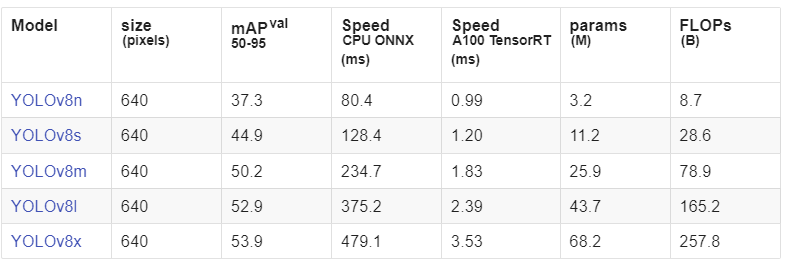

In [3]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# yolov8n.pt 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('yolov8n.pt')
# 모델 예측
results = model.predict(source='https://ultralytics.com/images/bus.jpg', save=True)

100%|██████████| 6.23M/6.23M [00:00<00:00, 146MB/s]

100%|██████████| 476k/476k [00:00<00:00, 60.3MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 328.4ms
Speed: 17.9ms preprocess, 328.4ms inference, 31.6ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


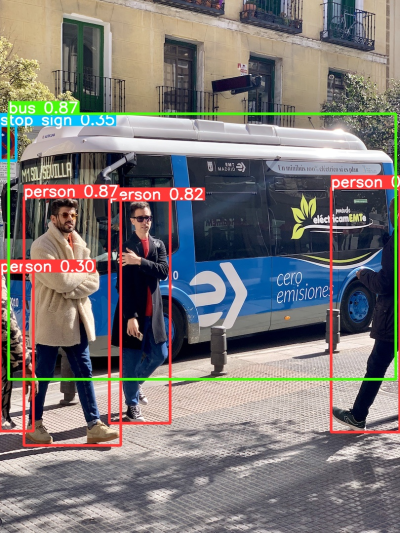

In [11]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/detect/predict/bus.jpg')
fix_width = 400
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

**2.2 Segmentation(분할)**

- Segmentation 모델로 사용할 수 있는 모델의 종류

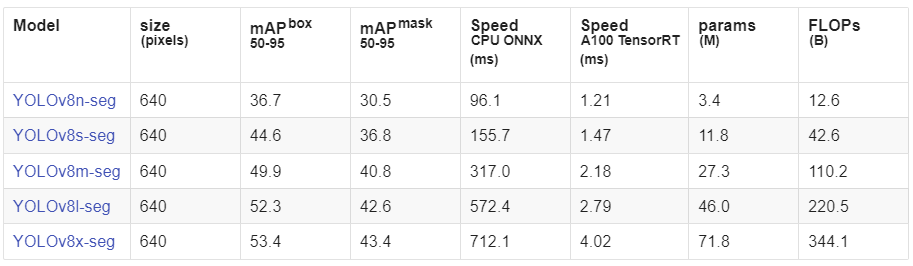

In [9]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# yolov8n-seg.pt 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('yolov8n-seg.pt')
# 모델 예측
results = model.predict(source='https://ultralytics.com/images/bus.jpg', save=True)

100%|██████████| 6.73M/6.73M [00:00<00:00, 236MB/s]

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 1 skateboard, 355.2ms
Speed: 7.5ms preprocess, 355.2ms inference, 33.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict


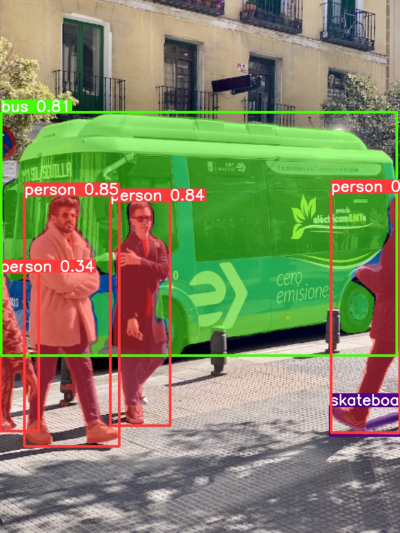

In [10]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/segment/predict/bus.jpg')
fix_width = 400
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

2.3 Pose(포즈)

- Pose 모델로 사용할 수 있는 모델의 종류

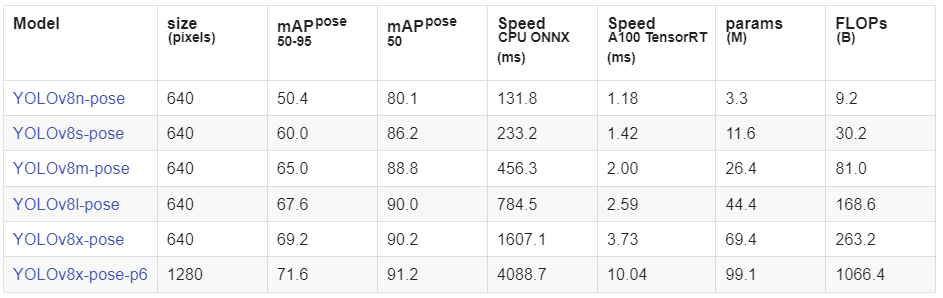

In [12]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# yolov8n-pose.pt 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('yolov8n-pose.pt')
# 모델 예측
results = model.predict(source='https://ultralytics.com/images/bus.jpg', save=True)

100%|██████████| 6.49M/6.49M [00:00<00:00, 210MB/s]

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /content/bus.jpg: 640x480 4 persons, 199.1ms
Speed: 5.3ms preprocess, 199.1ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/pose/predict


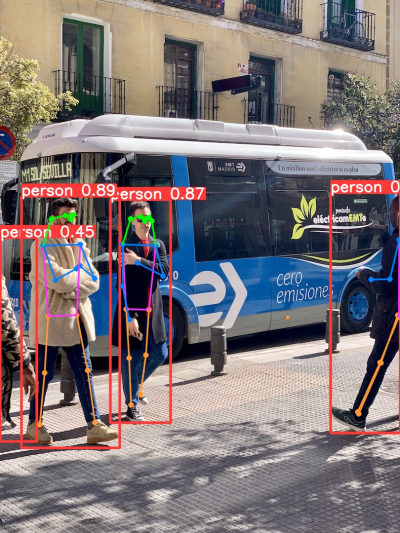

In [13]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/pose/predict/bus.jpg')
fix_width = 400
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)

# **3.우리가 원하는 데이터셋으로 YOLOv8 모델을 학습시켜서 Detection(검출), Segmentation(분할), Tracking(추적), Pose(포즈) 를 예측할 수 없을까?**